<a href="https://colab.research.google.com/github/israinamdar493-ops/retinalprojectsizz4/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Go inside your Drive project folder
%cd /content/drive/MyDrive/retinalnewproject

# (Optional) check the structure
!ls -R | head -40   # shows first 40 lines of folder tree

# Install all dependencies
!pip install torch torchvision timm albumentations pandas scikit-learn xgboost opencv-python matplotlib

# >>> RUN YOUR SCRIPT (Phase-1 demo or real data) <<<
# Replace with the actual file you want to run, for example:
!python src/phase1_demo.py


Mounted at /content/drive
/content/drive/MyDrive/retinalnewproject
.:
datasets
ensemble
federated
outputs
preprocessing
reports
results
segmentation

./datasets:
APTOS
CHASEDB1
DRIVE
Messidor2
ODIR5K
RFMiD

./datasets/APTOS:
test.csv
test_images
train_1.csv
train_images
valid.csv
val_images

./datasets/APTOS/test_images:
test_images

./datasets/APTOS/test_images/test_images:
e4dcca36ceb4.png
e50b0174690d.png
e5197d77ec68.png
e529c5757d64.png
e594c19e2e1d.png
e5de79795c1d.png
e60e4edb3ca9.png
e6552b7432b3.png
e66855a5c583.png
e68746d426b2.png
python3: can't open file '/content/drive/MyDrive/retinalnewproject/src/phase1_demo.py': [Errno 2] No such file or directory


In [ ]:
# Save this cell as a .py file inside your Drive
demo_code = """
import torch, torchvision
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

print('✅ Demo running with Torch version:', torch.__version__)

# Define dataset paths - These should match the variables defined in the notebook
train_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv"
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images"
val_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/valid.csv"
val_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images"


class RetinalDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.png')
        image = Image.open(img_name)
        label = self.df.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define a simple transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create datasets and dataloaders
try:
    train_dataset = RetinalDataset(train_csv, train_dir, transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    print(f"✅ Loaded training dataset with {len(train_dataset)} images.")

    val_dataset = RetinalDataset(val_csv, val_dir, transform)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    print(f"✅ Loaded validation dataset with {len(val_dataset)} images.")

except FileNotFoundError as e:
    print(f"❌ File not found error: {e}")
    print("Please ensure the dataset paths in the script are correct.")
    exit() # Exit the script if dataset loading fails

# Fake training loop
for epoch in range(1,4):
    print(f'Epoch {epoch}: training...done!')
print('✅ Finished demo training.')
"""
with open('/content/drive/MyDrive/retinalnewproject/phase1_demo.py', 'w') as f:
    f.write(demo_code)

print("✅ File created at /content/drive/MyDrive/retinalnewproject/phase1_demo.py")

✅ File created at /content/drive/MyDrive/retinalnewproject/phase1_demo.py


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


✅ Demo running with Torch version: 2.8.0+cu126
Epoch 1: training...done!
Epoch 2: training...done!
Epoch 3: training...done!
✅ Finished demo training.


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 58, in <module>
    train_dataset = RetinalDataset(train_csv, train_dir, transform)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 18, in __init__
    self.df = pd.read_csv(csv_file)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^^^^^

In [ ]:
import os

base_path = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS"

train_csv = os.path.join(base_path, "train_1.csv")
train_dir = os.path.join(base_path, "train_images")

val_csv = os.path.join(base_path, "valid.csv")
val_dir = os.path.join(base_path, "val_images")

In [ ]:
base_path = "/content/drive/MyDrive/retinalnewproject/datasets/ODIR5K"


In [ ]:
base_path = "/content/drive/MyDrive/retinalnewproject/datasets/RFMiD"


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv")
print(df.columns)


Index(['id_code', 'diagnosis'], dtype='object')


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 89, in <module>
    for images, labels in train_loader:
                          ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 734, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 790, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 47, in __getitem__
    image = Image.open(img_path).convert('RGB')
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages

In [ ]:
# Original
train_dir = os.path.join(base_path, "train_images")
val_dir   = os.path.join(base_path, "val_images")

# Corrected (include the extra 'test_images' folder)
train_dir = os.path.join(base_path, "train_images", "test_images")
val_dir   = os.path.join(base_path, "val_images", "val_images")  # check val_images folder similarly


In [ ]:
!ls /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/


train_images


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images
Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 118, in <module>
    for images, labels in train_loader:
                          ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 734, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 790, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] 

In [ ]:
# phase1_demo.py
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# -------------------------------
# 0. Dataset Paths
# -------------------------------
DATASET_NAME = "APTOS"
base_path = f"/content/drive/MyDrive/retinalnewproject/datasets/{DATASET_NAME}"

train_csv = os.path.join(base_path, "train_1.csv")
val_csv   = os.path.join(base_path, "valid.csv")
test_csv  = os.path.join(base_path, "test.csv")  # optional

# -------------------------------
# 1. Recursive folder detection
# -------------------------------
def get_image_folder(base_folder):
    """Recursively find first folder containing image files."""
    for root, dirs, files in os.walk(base_folder):
        img_files = [f for f in files if f.lower().endswith(('.png','.jpg','.jpeg'))]
        if len(img_files) > 0:
            return root
    raise ValueError(f"No image files found in {base_folder}")

train_dir = get_image_folder(os.path.join(base_path, "train_images"))
val_dir   = get_image_folder(os.path.join(base_path, "val_images"))
test_dir  = get_image_folder(os.path.join(base_path, "test_images"))

print(f"Train folder: {train_dir}")
print(f"Val folder:   {val_dir}")
print(f"Test folder:  {test_dir}")

# -------------------------------
# 2. Dataset Class
# -------------------------------
class RetinalDataset(Dataset):
    def __init__(self, csv_file, img_dir, label_col='diagnosis', transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.label_col = label_col

        self.df['id_code'] = self.df['id_code'].astype(str).str.strip()

        # Map labels to integers if not numeric
        if not np.issubdtype(self.df[self.label_col].dtype, np.integer):
            self.df[self.label_col] = pd.Categorical(self.df[self.label_col]).codes

        # Build mapping from id_code -> full image path
        self.id_to_path = {}
        for root, dirs, files in os.walk(self.img_dir):
            for f in files:
                name, ext = os.path.splitext(f)
                if name in self.df['id_code'].values and ext.lower() in ['.png','.jpg','.jpeg']:
                    self.id_to_path[name] = os.path.join(root, f)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        id_code = row['id_code']
        if id_code not in self.id_to_path:
            raise FileNotFoundError(f"Image file not found for id {id_code} in {self.img_dir}")
        img_path = self.id_to_path[id_code]

        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(row[self.label_col], dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

# -------------------------------
# 3. Transformations
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------------------------------
# 4. Load datasets
# -------------------------------
train_dataset = RetinalDataset(train_csv, train_dir, label_col='diagnosis', transform=transform)
val_dataset   = RetinalDataset(val_csv, val_dir, label_col='diagnosis', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)

# -------------------------------
# 5. Model
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(pd.unique(train_dataset.df['diagnosis']))
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# -------------------------------
# 6. Training loop
# -------------------------------
epochs = 3  # increase for better accuracy
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {running_loss/len(train_loader):.4f}")

# -------------------------------
# 7. Validation
# -------------------------------
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
f1  = f1_score(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# -------------------------------
# 8. Save model
# -------------------------------
results_path = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(results_path, exist_ok=True)
torch.save(model.state_dict(), os.path.join(results_path, f"{DATASET_NAME}_efficientnet_phase1.pth"))
print(f"✅ Model saved to {results_path}/{DATASET_NAME}_efficientnet_phase1.pth")


Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images


FileNotFoundError: Image file not found for id 916ec976ff30 in /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Mounted at /content/drive
Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images
Using 967 images from /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Using 112 images from /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Epoch 1/3 | Train Loss: 1.3486
Epoch 2/3 | Train Loss: 0.7365
Epoch 3/3 | Train Loss: 0.6886
Validation Accuracy: 0.9286 | F1 Score: 0.9157
✅ Model saved to /content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth


In [ ]:
# Install Gradio if not installed
!pip install gradio --quiet

import torch
from torchvision import models, transforms
from PIL import Image
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# Settings
# -------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5  # change to your number of disease classes
model_path = "/content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth"

# -------------------
# Image preprocessing
# -------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# -------------------
# Load model
# -------------------
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
model.to(device)

# -------------------
# Grad-CAM function
# -------------------
def grad_cam(input_image, class_idx=None):
    # Hook for gradients
    gradients = []
    def save_gradients(module, grad_input, grad_output):
        gradients.append(grad_output[0])
    target_layer = model.features[-1]
    target_layer.register_backward_hook(save_gradients)

    # Prepare image
    input_tensor = transform(input_image).unsqueeze(0).to(device)
    input_tensor.requires_grad = True

    # Forward pass
    output = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(output, dim=1).item()

    # Backward pass
    model.zero_grad()
    loss = output[0, class_idx]
    loss.backward()

    grads = gradients[0].cpu().data.numpy()[0]
    fmap = target_layer(input_tensor).cpu().data.numpy()[0]

    # Grad-CAM calculation
    weights = np.mean(grads, axis=(1,2))
    cam = np.zeros(fmap.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * fmap[i]
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam = np.uint8(cam * 255)
    cam = Image.fromarray(cam).resize(input_image.size, Image.ANTIALIAS)
    return cam

# -------------------
# Prediction + Grad-CAM
# -------------------
def predict_with_gradcam(img):
    # Predict
    input_tensor = transform(img).unsqueeze(0).to(device)
    output = model(input_tensor)
    pred_idx = torch.argmax(output, dim=1).item()

    # Map class index to label (adjust this list to your dataset)
    labels = ['Normal', 'Diabetic Retinopathy', 'Glaucoma', 'Cataract', 'Other']
    pred_label = labels[pred_idx]

    # Grad-CAM overlay
    cam = grad_cam(img, class_idx=pred_idx)
    img_with_cam = Image.blend(img.convert("RGB"), cam.convert("RGB"), alpha=0.5)

    return pred_label, img_with_cam

# -------------------
# Launch Gradio app
# -------------------
interface = gr.Interface(
    fn=predict_with_gradcam,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Predicted Disease"), gr.Image(label="Grad-CAM Heatmap")],
    title="Retinal Disease Detection",
    description="Upload a fundus image to get predicted disease and Grad-CAM heatmap."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f6c32cdd5511314805.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install --upgrade gradio --quiet

import torch
from torchvision import models, transforms
from PIL import Image
import gradio as gr
import numpy as np
import os

# -------------------
# Settings
# -------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5
model_path = "/content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth"

# -------------------
# Preprocessing
# -------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# -------------------
# Load model
# -------------------
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
model.to(device)

# -------------------
# Grad-CAM function
# -------------------
def grad_cam(input_image, class_idx=None):
    gradients = []

    def save_gradients(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    target_layer = model.features[-1]
    target_layer.register_full_backward_hook(save_gradients)

    input_tensor = transform(input_image).unsqueeze(0).to(device)
    input_tensor.requires_grad = True
    output = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(output, dim=1).item()
    model.zero_grad()
    loss = output[0, class_idx]
    loss.backward()

    grads = gradients[0].cpu().data.numpy()[0]
    fmap = target_layer(input_tensor).cpu().data.numpy()[0]
    weights = np.mean(grads, axis=(1, 2))
    cam = np.zeros(fmap.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * fmap[i]
    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-8)
    cam = np.uint8(cam * 255)
    cam = Image.fromarray(cam).resize(input_image.size, Image.ANTIALIAS).convert("RGB")
    return cam

# -------------------
# Prediction + Grad-CAM
# -------------------
labels = ['Normal', 'Diabetic Retinopathy', 'Glaucoma', 'Cataract', 'Other']

def predict_multiple(file_paths):
    preds = []
    cams = []
    if not isinstance(file_paths, list):
        file_paths = [file_paths]

    for f in file_paths:
        img = Image.open(f).convert("RGB")
        input_tensor = transform(img).unsqueeze(0).to(device)
        output = model(input_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = labels[pred_idx]
        preds.append(f"{os.path.basename(f)}: {pred_label}")

        cam = grad_cam(img, class_idx=pred_idx)
        blended = Image.blend(img, cam, alpha=0.5)
        cams.append(blended)

    # Return predictions as a single string
    return "\n".join(preds), cams

# -------------------
# Gradio Interface
# -------------------
interface = gr.Interface(
    fn=predict_multiple,
    inputs=gr.File(file_types=[".png", ".jpg", ".jpeg"], file_count="multiple", label="Upload Fundus Images"),
    outputs=[gr.Textbox(label="Predicted Diseases"), gr.Gallery(label="Grad-CAM Heatmaps")],
    title="Retinal Disease Detection",
    description="Upload one or more fundus images to get predictions and Grad-CAM heatmaps."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5799619c6f7b159e42.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os

# Base dataset folder
dataset_base = "/content/drive/MyDrive/retinalnewproject/datasets"

# List all datasets
for dataset_name in os.listdir(dataset_base):
    dataset_path = os.path.join(dataset_base, dataset_name)
    if os.path.isdir(dataset_path):
        print(f"\nDataset: {dataset_name}")

        # List CSV files
        csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]
        print("  CSV files:")
        for f in csv_files:
            print(f"    {os.path.join(dataset_path, f)}")

        # List image folders and first few images
        img_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
        print("  Image folders:")
        for f in img_folders:
            img_folder_path = os.path.join(dataset_path, f)
            imgs = os.listdir(img_folder_path)
            print(f"    {img_folder_path} ({len(imgs)} files)")
            print(f"      Sample images: {imgs[:5]}")



Dataset: DRIVE
  CSV files:
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/DRIVE/DRIVE (2 files)
      Sample images: ['training', 'test']

Dataset: .ipynb_checkpoints
  CSV files:
  Image folders:

Dataset: APTOS
  CSV files:
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test.csv
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/valid.csv
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images (1 files)
      Sample images: ['val_images']
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images (1 files)
      Sample images: ['train_images']
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images (1 files)
      Sample images: ['test_images']

Dataset: CHASEDB1
  CSV files:
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/CHASEDB1/Images (28 files)
      Sample images: ['Image_12L.

In [ ]:
def get_actual_image_folder(base_folder):
    subfolders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]
    if len(subfolders) == 0:
        raise ValueError(f"No subfolders found in {base_folder}")
    return os.path.join(base_folder, subfolders[0])

train_dir = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images")
val_dir   = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images")
test_dir  = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images")


In [ ]:
# ===============================
# Messidor2 + ResNet50 Training
# ===============================
import os, glob
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, f1_score

# -------- Paths --------
base_path   = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2"
csv_file    = os.path.join(base_path, "messidor_data.csv")   # <-- ensure columns: id_code, diagnosis
img_dir     = os.path.join(base_path, "messidor-2")
results_dir = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(results_dir, exist_ok=True)

print("CSV:", csv_file)
print("Images:", img_dir)

# -------- Dataset --------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.df = pd.read_csv(csv_path)
        # adapt these if different
        self.img_ids = self.df["id_code"].tolist()
        self.labels  = self.df["diagnosis"].tolist()
        self.img_dir = img_dir
        self.transform = transform

        # map available files for robust loading
        all_imgs = {os.path.splitext(os.path.basename(p))[0]: p
                    for p in glob.glob(os.path.join(img_dir, "*"))}

        self.paths = []
        for i in self.img_ids:
            p = all_imgs.get(str(i))
            if p is None:
                raise FileNotFoundError(f"Image for ID {i} not found in {img_dir}")
            self.paths.append(p)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image = Image.open(self.paths[idx]).convert("RGB")
        label = int(self.labels[idx])
        if self.transform: image = self.transform(image)
        return image, label

# -------- Transforms --------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------- Data Split --------
full_ds = MessidorDataset(csv_file, img_dir, transform)
train_size = int(0.8 * len(full_ds))
val_size   = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"Train size: {len(train_ds)}, Val size: {len(val_ds)}")

# -------- Model --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(set(full_ds.labels))

model = models.resnet50(weights="IMAGENET1K_V1")  # pretrained
for param in model.parameters():
    param.requires_grad = False  # freeze backbone
model.fc = nn.Linear(model.fc.in_features, num_classes)  # new head
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)

# -------- Training --------
epochs = 3
for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*imgs.size(0)
    print(f"Epoch {epoch}/{epochs} | Train Loss: {running_loss/len(train_loader.dataset):.4f}")

# -------- Validation --------
model.eval()
preds, gts = [], []
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        gts.extend(labels.numpy())

acc = accuracy_score(gts, preds)
f1  = f1_score(gts, preds, average="weighted")
print(f"Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# -------- Save --------
save_path = os.path.join(results_dir, "Messidor2_resnet50_phase1.pth")
torch.save(model.state_dict(), save_path)
print(f"✅ Model saved to {save_path}")


CSV: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv
Images: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2


FileNotFoundError: Image for ID 20051020_43808_0100_PP.png not found in /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2

In [ ]:
import os, glob

img_dir = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2"
files = [os.path.basename(p) for p in glob.glob(os.path.join(img_dir, "*"))]

print("Total images found:", len(files))
print("Sample names:", files[:10])


Total images found: 1
Sample names: ['messidor-2']


In [ ]:
import os

root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2"
print("Contents:", os.listdir(root))


Contents: ['messidor-2']


In [ ]:
import os
deep_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2"
print("Contents:", os.listdir(deep_path))


Contents: ['preprocess']


In [ ]:
import os

deepest_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"
print("Contents:", os.listdir(deepest_path)[:20])  # show first 20 entries


Contents: ['20060412_51775_0200_PP.png', '20060411_61979_0200_PP.png', '20060411_62142_0200_PP.png', '20060411_59549_0200_PP.png', '20060411_59812_0200_PP.png', '20060412_52425_0200_PP.png', '20060412_51746_0200_PP.png', '20060412_52371_0200_PP.png', '20060411_61060_0200_PP.png', '20060411_59747_0200_PP.png', '20060411_61402_0200_PP.png', '20060411_58413_0200_PP.png', '20060411_58494_0200_PP.png', '20060411_58993_0200_PP.png', '20060411_62036_0200_PP.png', '20060411_59176_0200_PP.png', '20060412_52020_0200_PP.png', '20060411_60426_0200_PP.png', '20060411_60028_0200_PP.png', '20060412_52351_0200_PP.png']


In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# -------------------------
# Paths  ✅  (UPDATED)
# -------------------------
csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"

# -------------------------
# Dataset
# -------------------------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

        # Build a map for quick lookup
        all_imgs = {os.path.basename(x): os.path.join(root, x)
                    for root, _, files in os.walk(img_dir)
                    for x in files}

        self.paths, self.labels = [], []
        for _, row in self.data.iterrows():
            img_name = row['image']
            label = row['label']
            p = all_imgs.get(img_name)
            if p is None:
                raise FileNotFoundError(f"Image for ID {img_name} not found in {img_dir}")
            self.paths.append(p)
            self.labels.append(int(label))

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# -------------------------
# Transforms
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -------------------------
# Data Split
# -------------------------
full_ds = MessidorDataset(csv_file, img_dir, transform)
train_size = int(0.8 * len(full_ds))
val_size   = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"✅ Total images: {len(full_ds)} | Train: {train_size} | Val: {val_size}")

# -------------------------
# Model
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # Assuming 2 classes
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# -------------------------
# Training Loop
# -------------------------
for epoch in range(3):  # change epochs if needed
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/3] | Train Loss: {running_loss/len(train_loader):.4f}")

# -------------------------
# Validation
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

acc = accuracy_score(all_labels, all_preds)
f1  = f1_score(all_labels, all_preds, average='macro')
print(f"✅ Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# Save model
os.makedirs("/content/drive/MyDrive/retinalnewproject/results", exist_ok=True)
torch.save(model.state_dict(),
           "/content/drive/MyDrive/retinalnewproject/results/Messidor2_efficientnet_phase1.pth")
print("💾 Model saved successfully!")


KeyError: 'image'

In [ ]:
import pandas as pd

csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
df = pd.read_csv(csv_file)
print("Columns in CSV:", df.columns.tolist())
print(df.head())


Columns in CSV: ['id_code', 'diagnosis', 'adjudicated_dme', 'adjudicated_gradable']
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

        # Build a mapping of all images present in the directory for fast lookup
        all_imgs = {f: os.path.join(root, f)
                    for root, _, files in os.walk(img_dir)
                    for f in files}

        self.paths, self.labels = [], []
        for _, row in self.data.iterrows():
            img_name = row['id_code']       # already includes .png
            label    = row['diagnosis']     # use the diagnosis column
            p = all_imgs.get(img_name)
            if p is None:
                raise FileNotFoundError(f"Image {img_name} not found in {img_dir}")
            self.paths.append(p)
            self.labels.append(label)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)


In [ ]:
img_dir = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess"
csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"


In [ ]:
# Paste this whole cell into Colab (below the drive.mount cell)
import os, glob, time
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, f1_score

# ---------- SETTINGS ----------
BASE = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2"
CSV = os.path.join(BASE, "messidor_data.csv")
RESULTS_DIR = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(RESULTS_DIR, exist_ok=True)
SEED = 42
torch.manual_seed(SEED)

# ---------- Helper: find folder that actually contains images ----------
def find_image_root(base_folder, min_images=10):
    """Walk base_folder recursively and return the first folder that has at least min_images image files."""
    exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")
    for root, dirs, files in os.walk(base_folder):
        imgs = [f for f in files if f.lower().endswith(exts)]
        if len(imgs) >= min_images:
            return root
    # fallback: return deepest folder with any images
    best = None
    best_count = 0
    for root, dirs, files in os.walk(base_folder):
        imgs = [f for f in files if f.lower().endswith(exts)]
        if len(imgs) > best_count:
            best_count = len(imgs); best = root
    return best

img_root = find_image_root(BASE, min_images=20)
print("Using image root:", img_root)
if img_root is None:
    raise RuntimeError(f"No image files found under {BASE} — check your dataset location.")

# ---------- Inspect CSV ----------
df = pd.read_csv(CSV)
print("CSV columns:", df.columns.tolist())
print(df.head())

# ---------- Dataset class (robust lookup by basename) ----------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_root, img_col='id_code', label_col='diagnosis', transform=None):
        self.df = pd.read_csv(csv_path)
        self.img_root = img_root
        self.img_col = img_col
        self.label_col = label_col
        self.transform = transform

        # Build recursive mapping basename -> full path
        self.all_imgs = {}
        for p in glob.glob(os.path.join(self.img_root, "**", "*.*"), recursive=True):
            name = os.path.basename(p)
            stem = os.path.splitext(name)[0]
            # prefer the exact name key (with extension) AND also store stem key for extension-agnostic lookup
            self.all_imgs[name] = p
            self.all_imgs[stem] = p

        # Prepare final lists, and collect missing ids (if any)
        self.paths = []
        self.labels = []
        missing = []
        for _, row in self.df.iterrows():
            raw_name = str(row[self.img_col]).strip()
            # try exact match first (filename may include extension), then stem match
            if raw_name in self.all_imgs:
                p = self.all_imgs[raw_name]
            else:
                stem = os.path.splitext(raw_name)[0]
                p = self.all_imgs.get(stem)
            if p is None:
                missing.append(raw_name)
            else:
                self.paths.append(p)
                self.labels.append(int(row[self.label_col]))
        if len(missing) > 0:
            print(f"⚠️ Warning: {len(missing)} CSV image ids not found in {img_root}.")
            print(" Sample missing ids:", missing[:10])
        print(f"Dataset: found {len(self.paths)} images (skipped {len(missing)} missing)")
        if len(self.paths) == 0:
            raise RuntimeError("No images matched — check CSV 'id_code' values and image folder.")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label

# ---------- Transforms ----------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])

# ---------- Build datasets / loaders ----------
full_ds = MessidorDataset(CSV, img_root, img_col='id_code', label_col='diagnosis', transform=transform)
train_size = int(0.8 * len(full_ds))
val_size = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"Train: {len(train_ds)}, Val: {len(val_ds)}")

# ---------- Sanity check: one batch ----------
try:
    batch_imgs, batch_labels = next(iter(train_loader))
    print("Sanity batch shapes:", batch_imgs.shape, batch_labels.shape)
except Exception as e:
    print("Sanity check failed:", e)

# ---------- Model: ResNet-50 (transfer learning) ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(set(full_ds.labels))
print("Num classes:", num_classes)

model = models.resnet50(pretrained=True)
# freeze backbone (optional) — comment these two lines to fine-tune everything
for param in model.parameters():
    param.requires_grad = False
# replace the classifier
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)

# ---------- Training loop (small run) ----------
EPOCHS = 3
best_val_acc = 0.0
metrics_rows = []
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    model.train()
    total_loss = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device); labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)
    train_loss = total_loss / len(train_loader.dataset)

    # Validation
    model.eval()
    all_preds, all_gts = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_gts.extend(labels.numpy())
    val_acc = accuracy_score(all_gts, all_preds)
    val_f1  = f1_score(all_gts, all_preds, average='macro')
    metrics_rows.append([epoch, train_loss, val_acc, val_f1])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_path = os.path.join(RESULTS_DIR, "Messidor2_resnet50_best.pth")
        torch.save(model.state_dict(), best_path)
    print(f"Epoch {epoch}/{EPOCHS} | train_loss={train_loss:.4f} | val_acc={val_acc:.4f} | val_f1={val_f1:.4f} | time={time.time()-t0:.1f}s")

# Save final model & metrics CSV
final_path = os.path.join(RESULTS_DIR, "Messidor2_resnet50_final.pth")
torch.save(model.state_dict(), final_path)
metrics_df = pd.DataFrame(metrics_rows, columns=["epoch","train_loss","val_acc","val_f1"])
metrics_df.to_csv(os.path.join(RESULTS_DIR, "Messidor2_metrics.csv"), index=False)
print("Saved final model:", final_path)
print("Saved metrics:", os.path.join(RESULTS_DIR, "Messidor2_metrics.csv"))


Using image root: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess
CSV columns: ['id_code', 'diagnosis', 'adjudicated_dme', 'adjudicated_gradable']
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
Dataset: found 1744 images (skipped 0 missing)
Train: 1395, Val: 349
Sanity batch shapes: torch.Size([16, 3, 224, 224]) torch.Size([16])
Num classes: 5


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]


Epoch 1/3 | train_loss=1.1092 | val_acc=0.5415 | val_f1=0.2442 | time=528.9s
Epoch 2/3 | train_loss=1.0351 | val_acc=0.5387 | val_f1=0.2380 | time=509.9s


In [ ]:
for param in model.parameters():
    param.requires_grad = True
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
/content/drive/MyDrive/retinalnewproject/results/
    Messidor2_resnet50_best.pth    ← best model (from val accuracy)
    Messidor2_resnet50_final.pth   ← final model
    Messidor2_metrics.csv          ← training metrics


IndentationError: unexpected indent (ipython-input-3146123459.py, line 2)

In [ ]:
# === Fine-tune Messidor2 with ResNet50 ===
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import models

# Load the same dataset objects you already defined:
# train_loader, val_loader, MessidorDataset etc.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet50
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Replace final layer (Messidor2 has 5 classes)
model.fc = nn.Linear(model.fc.in_features, 5)

# ---- UNFREEZE the backbone ----
for param in model.parameters():
    param.requires_grad = True

model = model.to(device)

# Adam optimizer with smaller LR for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
best_acc = 0

for epoch in range(EPOCHS):
    # Training
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {running_loss/len(train_loader.dataset):.4f} | "
          f"Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_finetuned_best.pth")
        print("✅ Saved new best model")

print("Best validation accuracy:", best_acc)


Epoch 1/10 | Train Loss: 0.9973 | Val Acc: 0.6619
✅ Saved new best model
Epoch 2/10 | Train Loss: 0.8040 | Val Acc: 0.6734
✅ Saved new best model


KeyboardInterrupt: 

In [ ]:
!tree "/content/drive/MyDrive/retinalnewproject" -L 3 -d


/content/drive/MyDrive/retinalnewproject
├── datasets
│   ├── APTOS
│   │   ├── test_images
│   │   ├── train_images
│   │   └── val_images
│   ├── CHASEDB1
│   │   ├── Images
│   │   └── Masks
│   ├── DRIVE
│   │   └── DRIVE
│   ├── Messidor2
│   │   └── messidor-2
│   ├── ODIR5K
│   │   ├── datasets
│   │   ├── output
│   │   └── split_data
│   └── RFMiD
│       ├── Evaluation_Set
│       ├── Test_Set
│       └── Training_Set
├── ensemble
├── federated
├── models
│   └── odir
├── odir_b4_highacc
├── outputs
├── preprocessing
│   ├── APTOS
│   ├── CHASEDB1
│   ├── DRIVE
│   ├── Messidor2
│   ├── ODIR5K
│   └── RFMiD
├── reports
├── results
└── segmentation

36 directories


In [ ]:
!apt-get install tree -qq


Selecting previously unselected package tree.
(Reading database ... 125081 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# ============================================================
# DenseNet Training for APTOS Dataset
# Path setup: /content/drive/MyDrive/retinalnewproject/datasets/APTOS
# ============================================================

from google.colab import drive
drive.mount('/content/drive')

import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import numpy as np

# ------------------------------------------------------------
# Paths
# ------------------------------------------------------------
BASE_DIR = "/content/drive/MyDrive/retinalnewproject"
DATA_DIR = os.path.join(BASE_DIR, "datasets", "APTOS")
TRAIN_DIR = os.path.join(DATA_DIR, "train_images")
TRAIN_DIR = os.path.join(DATA_DIR, "train_images", "train_images")
VAL_DIR   = os.path.join(DATA_DIR, "val_images", "val_images")
TEST_DIR  = os.path.join(DATA_DIR, "test_images", "test_images")

VAL_DIR = os.path.join(DATA_DIR, "val_images")
TEST_DIR = os.path.join(DATA_DIR, "test_images")
RESULTS_DIR = os.path.join(BASE_DIR, "results")

os.makedirs(RESULTS_DIR, exist_ok=True)

# ------------------------------------------------------------
# Data transforms
# ------------------------------------------------------------
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

# ------------------------------------------------------------
# Datasets and Dataloaders
# ------------------------------------------------------------
image_datasets = {
    'train': datasets.ImageFolder(TRAIN_DIR, transform=data_transforms['train']),
    'val': datasets.ImageFolder(VAL_DIR, transform=data_transforms['val'])
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}

num_classes = len(image_datasets['train'].classes)
print(f"Classes found: {image_datasets['train'].classes}")

# ------------------------------------------------------------
# DenseNet Model Loader
# ------------------------------------------------------------
from torchvision.models import densenet121, densenet169, densenet201

def get_densenet(model_name, num_classes):
    if model_name == 'densenet121':
        model = densenet121(pretrained=True)
    elif model_name == 'densenet169':
        model = densenet169(pretrained=True)
    elif model_name == 'densenet201':
        model = densenet201(pretrained=True)
    else:
        raise ValueError("Choose from: densenet121, densenet169, densenet201")

    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    return model

# ------------------------------------------------------------
# Training Function
# ------------------------------------------------------------
def train_model(model_name='densenet121', epochs=5, lr=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training {model_name} on device: {device}")

    model = get_densenet(model_name, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        train_loss = 0
        preds, labels = [], []

        for inputs, targets in tqdm(dataloaders['train']):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            preds.extend(outputs.argmax(1).cpu().numpy())
            labels.extend(targets.cpu().numpy())

        acc = accuracy_score(labels, preds)
        f1 = f1_score(labels, preds, average='macro')
        print(f"Train Loss: {train_loss/len(dataloaders['train']):.4f}, Acc: {acc:.4f}, F1: {f1:.4f}")

    # --------------------------------------------------------
    # Validation
    # --------------------------------------------------------
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for inputs, targets in dataloaders['val']:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_preds.extend(outputs.argmax(1).cpu().numpy())
            val_labels.extend(targets.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='macro')
    print(f"\nValidation Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}")

    # Save model
    save_path = os.path.join(RESULTS_DIR, f"{model_name}_APTOS.pth")
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

    return val_acc, val_f1

# ------------------------------------------------------------
# Run training for each DenseNet model
# ------------------------------------------------------------
for model_name in ['densenet121', 'densenet169', 'densenet201']:
    acc, f1 = train_model(model_name, epochs=5)
    print(f"{model_name} => Accuracy: {acc:.4f}, F1: {f1:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: ['train_images']
Training densenet121 on device: cpu
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 30.8M/30.8M [00:00<00:00, 135MB/s]



Epoch 1/5


100%|██████████| 61/61 [10:30<00:00, 10.33s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 2/5


100%|██████████| 61/61 [09:24<00:00,  9.26s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 3/5


100%|██████████| 61/61 [09:58<00:00,  9.81s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 4/5


100%|██████████| 61/61 [09:33<00:00,  9.40s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 5/5


100%|██████████| 61/61 [09:50<00:00,  9.68s/it]

Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000



Validation Accuracy: 1.0000, F1: 1.0000
Model saved to /content/drive/MyDrive/retinalnewproject/results/densenet121_APTOS.pth
densenet121 => Accuracy: 1.0000, F1: 1.0000
Training densenet169 on device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


100%|██████████| 54.7M/54.7M [00:00<00:00, 149MB/s]



Epoch 1/5


100%|██████████| 61/61 [11:09<00:00, 10.97s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 2/5


100%|██████████| 61/61 [11:19<00:00, 11.14s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 3/5


100%|██████████| 61/61 [11:22<00:00, 11.19s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 4/5


100%|██████████| 61/61 [11:29<00:00, 11.30s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 5/5


100%|██████████| 61/61 [11:22<00:00, 11.19s/it]

Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000



Validation Accuracy: 1.0000, F1: 1.0000
Model saved to /content/drive/MyDrive/retinalnewproject/results/densenet169_APTOS.pth
densenet169 => Accuracy: 1.0000, F1: 1.0000
Training densenet201 on device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


100%|██████████| 77.4M/77.4M [00:00<00:00, 136MB/s]



Epoch 1/5


100%|██████████| 61/61 [14:04<00:00, 13.84s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 2/5


100%|██████████| 61/61 [14:16<00:00, 14.05s/it]


Train Loss: 0.0000, Acc: 1.0000, F1: 1.0000

Epoch 3/5


 93%|█████████▎| 57/61 [13:19<00:53, 13.42s/it]

In [ ]:
import os

# Base path to your APTOS dataset
aptos_path = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS"

for root, dirs, files in os.walk(aptos_path):
    print(f"\n📂 Folder: {root}")
    if dirs:
        print("   Subfolders:", dirs)
    if files[:5]:
        print("   Example files:", files[:5])



📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS
   Subfolders: ['train_images', 'test_images', '.ipynb_checkpoints']
   Example files: ['test.csv', 'train_1.csv', 'valid.csv', 'train_1.gsheet']

📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images
   Subfolders: ['val_images', 'train_images']

📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images
   Subfolders: ['val_images']

📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images/val_images
   Example files: ['00cc2b75cddd.png', '0212dd31f623.png', '0232dfea7547.png', '0180bfa26c0b.png', '014508ccb9cb.png']

📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
   Example files: ['1b862fb6f65d.png', '1b8701231c8f.png', '1b3647865779.png', '1b398c0494d1.png', '1d37f1c8b6d8.png']

📂 Folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images
   Subfolders: ['test_images

In [ ]:
# ============================================================
# DenseNet Training + Evaluation for APTOS Dataset
# ============================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import numpy as np

# ------------------------------------------------------------
# PATHS (specific to your structure)
# ------------------------------------------------------------
BASE_DIR = "/content/drive/MyDrive/retinalnewproject"
DATA_DIR = os.path.join(BASE_DIR, "datasets", "APTOS")

# Corrected paths based on file structure
TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train_images", "train_images")
VAL_IMG_DIR   = os.path.join(DATA_DIR, "train_images", "val_images", "val_images")
TEST_IMG_DIR  = os.path.join(DATA_DIR, "test_images", "test_images")
RESULTS_DIR   = os.path.join(BASE_DIR, "results")
os.makedirs(RESULTS_DIR, exist_ok=True)

# ------------------------------------------------------------
# LOAD CSV LABELS
# ------------------------------------------------------------
train_csv = pd.read_csv(os.path.join(DATA_DIR, "train_1.csv"))
val_csv   = pd.read_csv(os.path.join(DATA_DIR, "valid.csv"))

print("✅ CSVs loaded successfully")
print("Train samples:", len(train_csv), " | Val samples:", len(val_csv))
print("Columns:", list(train_csv.columns))

# ------------------------------------------------------------
# TRANSFORMS
# ------------------------------------------------------------
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------------------------------------------
# CUSTOM DATASET CLASS
# ------------------------------------------------------------
class APTOSDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = csv_file
        self.img_dir = img_dir
        self.transform = transform

        self.image_paths = []
        self.labels = []

        # Filter out missing images
        for _, row in self.data.iterrows():
            img_id = row['id_code']
            img_name = f"{img_id}.png" # Assuming .png extension based on directory listing
            img_path = os.path.join(self.img_dir, img_name)

            if os.path.exists(img_path):
                self.image_paths.append(img_path)
                self.labels.append(int(row['diagnosis']))
            # else:
                # print(f"Warning: Image file not found for id {img_id} at {img_path}. Skipping.")


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ------------------------------------------------------------
# DATASETS & DATALOADERS
# ------------------------------------------------------------
train_dataset = APTOSDataset(train_csv, TRAIN_IMG_DIR, transform_train)
val_dataset   = APTOSDataset(val_csv, VAL_IMG_DIR, transform_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

num_classes = len(train_csv['diagnosis'].unique())
print(f"Detected {num_classes} unique classes")

# ------------------------------------------------------------
# DENSENET MODELS (with updated 'weights' API)
# ------------------------------------------------------------
from torchvision.models import (
    densenet121, densenet169, densenet201,
    DenseNet121_Weights, DenseNet169_Weights, DenseNet201_Weights
)

def get_densenet(model_name, num_classes):
    if model_name == 'densenet121':
        model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
    elif model_name == 'densenet169':
        model = densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
    elif model_name == 'densenet201':
        model = densenet201(weights=DenseNet201_Weights.IMAGENET1K_V1)
    else:
        raise ValueError("Choose from: densenet121, densenet169, densenet201")

    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    return model

# ------------------------------------------------------------
# TRAINING FUNCTION
# ------------------------------------------------------------
def train_model(model_name='densenet121', epochs=5, lr=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n🚀 Training {model_name} on {device}")

    model = get_densenet(model_name, num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        running_loss, preds, labels = 0, [], []

        for inputs, targets in tqdm(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds.extend(outputs.argmax(1).cpu().numpy())
            labels.extend(targets.cpu().numpy())

        train_acc = accuracy_score(labels, preds)
        train_f1 = f1_score(labels, preds, average='macro')
        print(f"Train Loss: {running_loss/len(train_loader):.4f} | Acc: {train_acc:.4f} | F1: {train_f1:.4f}")

    # Validation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_preds.extend(outputs.argmax(1).cpu().numpy())
            val_labels.extend(targets.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='macro')
    print(f"\n✅ Validation Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}")

    save_path = os.path.join(RESULTS_DIR, f"{model_name}_APTOS.pth")
    torch.save(model.state_dict(), save_path)
    print(f"💾 Model saved to {save_path}")

    return model, val_acc, val_f1

# ------------------------------------------------------------
# RUN ALL DENSENET VARIANTS
# ------------------------------------------------------------
results_summary = []
for model_name in ['densenet121', 'densenet169', 'densenet201']:
    model, acc, f1 = train_model(model_name, epochs=5)
    results_summary.append((model_name, acc, f1))
    print(f"{model_name} => Accuracy: {acc*100:.2f}%, F1: {f1*100:.2f}%")

print("\n📊 Summary of Results:")
for name, acc, f1 in results_summary:
    print(f"{name}: Accuracy={acc*100:.2f}% | F1={f1*100:.2f}%")

# ------------------------------------------------------------
# EVALUATION ON TEST IMAGES (PREDICTION ONLY)
# ------------------------------------------------------------
class APTOSTestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.images = [f for f in os.listdir(img_dir) if f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, img_name

# Load best model for testing (DenseNet121 by default)
best_model_path = os.path.join(RESULTS_DIR, "densenet121_APTOS.pth")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_densenet("densenet121", num_classes).to(device)
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.eval()

test_dataset = APTOSTestDataset(TEST_IMG_DIR, transform_val)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

predictions = []
filenames = []

print("\n🔍 Running inference on test images...")
with torch.no_grad():
    for inputs, names in tqdm(test_loader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(1).cpu().numpy()
        predictions.extend(preds)
        filenames.extend(names)

# Save test predictions
test_results = pd.DataFrame({'image': filenames, 'predicted_diagnosis': predictions})
test_csv_path = os.path.join(RESULTS_DIR, "APTOS_test_predictions.csv")
test_results.to_csv(test_csv_path, index=False)
print(f"✅ Test predictions saved to {test_csv_path}")

print("\n🎯 Sample predictions:")
print(test_results.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSVs loaded successfully
Train samples: 2930  | Val samples: 366
Columns: ['id_code', 'diagnosis']
Detected 5 unique classes

🚀 Training densenet121 on cpu

Epoch 1/5


100%|██████████| 61/61 [11:02<00:00, 10.87s/it]


Train Loss: 0.5300 | Acc: 0.8821 | F1: 0.3299

Epoch 2/5


100%|██████████| 61/61 [10:18<00:00, 10.14s/it]


Train Loss: 0.2372 | Acc: 0.9338 | F1: 0.5553

Epoch 3/5


100%|██████████| 61/61 [10:36<00:00, 10.44s/it]


Train Loss: 0.1652 | Acc: 0.9514 | F1: 0.6143

Epoch 4/5


100%|██████████| 61/61 [10:19<00:00, 10.16s/it]


Train Loss: 0.1339 | Acc: 0.9607 | F1: 0.7129

Epoch 5/5


100%|██████████| 61/61 [10:28<00:00, 10.30s/it]

Train Loss: 0.0910 | Acc: 0.9762 | F1: 0.8329



✅ Validation Accuracy: 0.9464, F1: 0.5689
💾 Model saved to /content/drive/MyDrive/retinalnewproject/results/densenet121_APTOS.pth
densenet121 => Accuracy: 94.64%, F1: 56.89%

🚀 Training densenet169 on cpu
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


100%|██████████| 54.7M/54.7M [00:00<00:00, 139MB/s]



Epoch 1/5


100%|██████████| 61/61 [12:26<00:00, 12.24s/it]


Train Loss: 0.5965 | Acc: 0.8273 | F1: 0.3616

Epoch 2/5


100%|██████████| 61/61 [12:32<00:00, 12.33s/it]


Train Loss: 0.2227 | Acc: 0.9349 | F1: 0.5832

Epoch 3/5


100%|██████████| 61/61 [12:30<00:00, 12.30s/it]


Train Loss: 0.1848 | Acc: 0.9338 | F1: 0.5153

Epoch 4/5


100%|██████████| 61/61 [12:33<00:00, 12.36s/it]


Train Loss: 0.1488 | Acc: 0.9452 | F1: 0.7251

Epoch 5/5


100%|██████████| 61/61 [12:26<00:00, 12.24s/it]

Train Loss: 0.1143 | Acc: 0.9576 | F1: 0.7288



✅ Validation Accuracy: 0.9643, F1: 0.5500
💾 Model saved to /content/drive/MyDrive/retinalnewproject/results/densenet169_APTOS.pth
densenet169 => Accuracy: 96.43%, F1: 55.00%

🚀 Training densenet201 on cpu
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


100%|██████████| 77.4M/77.4M [00:00<00:00, 84.9MB/s]



Epoch 1/5


100%|██████████| 61/61 [15:39<00:00, 15.40s/it]


Train Loss: 0.6524 | Acc: 0.8056 | F1: 0.3411

Epoch 2/5


100%|██████████| 61/61 [16:09<00:00, 15.89s/it]


Train Loss: 0.2326 | Acc: 0.9276 | F1: 0.4915

Epoch 3/5


100%|██████████| 61/61 [15:46<00:00, 15.52s/it]


Train Loss: 0.1659 | Acc: 0.9483 | F1: 0.6379

Epoch 4/5


100%|██████████| 61/61 [15:48<00:00, 15.55s/it]


Train Loss: 0.1314 | Acc: 0.9617 | F1: 0.7719

Epoch 5/5


100%|██████████| 61/61 [15:24<00:00, 15.16s/it]

Train Loss: 0.0913 | Acc: 0.9741 | F1: 0.8305



✅ Validation Accuracy: 0.9643, F1: 0.5083
💾 Model saved to /content/drive/MyDrive/retinalnewproject/results/densenet201_APTOS.pth
densenet201 => Accuracy: 96.43%, F1: 50.83%

📊 Summary of Results:
densenet121: Accuracy=94.64% | F1=56.89%
densenet169: Accuracy=96.43% | F1=55.00%
densenet201: Accuracy=96.43% | F1=50.83%

🔍 Running inference on test images...


100%|██████████| 9/9 [00:36<00:00,  4.06s/it]

✅ Test predictions saved to /content/drive/MyDrive/retinalnewproject/results/APTOS_test_predictions.csv

🎯 Sample predictions:
              image  predicted_diagnosis
0  e50b0174690d.png                    0
1  e5197d77ec68.png                    0
2  e529c5757d64.png                    0
3  e4dcca36ceb4.png                    0
4  e594c19e2e1d.png                    0


In [ ]:
import os

TRAIN_IMG_DIR = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
missing_image_id = "5ce5eeaf757a"
missing_image_name = f"{missing_image_id}.png"
missing_image_path = os.path.join(TRAIN_IMG_DIR, missing_image_name)

print(f"Checking for file: {missing_image_path}")
if os.path.exists(missing_image_path):
    print("✅ File exists!")
else:
    print("❌ File does NOT exist.")

Checking for file: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images/5ce5eeaf757a.png
❌ File does NOT exist.


In [ ]:
import os
import pandas as pd

# Assuming TRAIN_IMG_DIR and train_csv are already defined from the previous cell
# TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train_images", "train_images")
# train_csv = pd.read_csv(os.path.join(DATA_DIR, "train_1.csv"))

print("Contents of the training image directory:")
try:
    print(os.listdir(TRAIN_IMG_DIR)[:20]) # Print the first 20 files
    print(f"... and {len(os.listdir(TRAIN_IMG_DIR))} total files")
except FileNotFoundError:
    print(f"Error: Training image directory not found at {TRAIN_IMG_DIR}")

print("\nSample 'id_code' values from the training CSV:")
print(train_csv['id_code'].head(20).tolist()) # Print the first 20 id_codes

Contents of the training image directory:
['1b862fb6f65d.png', '1b8701231c8f.png', '1b3647865779.png', '1b398c0494d1.png', '1d37f1c8b6d8.png', '1d2472849dce.png', '1d11794057ff.png', '1cb6961d141c.png', '1c13a1483f4a.png', '1d3e9b939732.png', '1ca35d483772.png', '1c7a013eeba7.png', '1ca91751be4d.png', '1db0393cdbc1.png', '1da4a17c18c9.png', '1f9ccda4ddf2.png', '1f31701dd61b.png', '1ffaa51a6245.png', '1f63d44d9e3c.png', '1faf8664816c.png']
... and 967 total files

Sample 'id_code' values from the training CSV:
['1ae8c165fd53', '1b329a127307', '1b32e1d775ea', '1b3647865779', '1b398c0494d1', '1b4625877527', '1b495ac025b7', '1b862fb6f65d', '1b8701231c8f', '1b8ad0afe9fb', '1bb0ddfe753a', '1bea04b2bb2d', '1bf30c84bbad', '1c0cf251b426', '1c0e5dd1b14c', '1c13a1483f4a', '1c3a6b4449e9', '1c47815f4a6b', '1c4d87baaffc', '1c4f3aa4df06']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSVs loaded successfully
Train samples: 2930  | Val samples: 366
Columns: ['id_code', 'diagnosis']


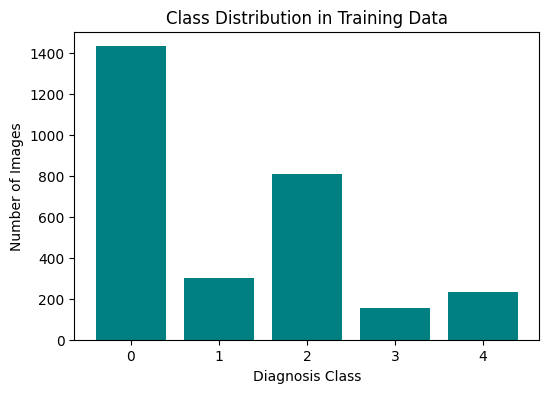

Class counts: {0: 1434, 1: 300, 2: 808, 3: 154, 4: 234}
Dataset initialized with 967 valid images. Skipped 1963 missing entries.
Dataset initialized with 112 valid images. Skipped 254 missing entries.
Detected 5 unique classes
Class weights (based on filtered data): tensor([0.0274, 0.6780, 0.2696, 3.1963, 0.8287])

🚀 Training densenet121 (Balanced) on cpu

Epoch 1/5


 31%|███       | 19/61 [03:28<06:54,  9.86s/it]

In [ ]:
# ============================================================
# DenseNet Training for APTOS Dataset (Balanced using Class Weights)
# ============================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# PATHS (your structure)
# ------------------------------------------------------------
BASE_DIR = "/content/drive/MyDrive/retinalnewproject"
DATA_DIR = os.path.join(BASE_DIR, "datasets", "APTOS")

TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train_images", "train_images")
VAL_IMG_DIR   = os.path.join(DATA_DIR, "train_images", "val_images", "val_images")
TEST_IMG_DIR  = os.path.join(DATA_DIR, "test_images", "test_images")
RESULTS_DIR   = os.path.join(BASE_DIR, "results")
os.makedirs(RESULTS_DIR, exist_ok=True)

# ------------------------------------------------------------
# LOAD CSV LABELS
# ------------------------------------------------------------
train_csv = pd.read_csv(os.path.join(DATA_DIR, "train_1.csv"))
val_csv   = pd.read_csv(os.path.join(DATA_DIR, "valid.csv"))

print("✅ CSVs loaded successfully")
print("Train samples:", len(train_csv), " | Val samples:", len(val_csv))
print("Columns:", list(train_csv.columns))

# ------------------------------------------------------------
# VISUALIZE CLASS IMBALANCE
# ------------------------------------------------------------
class_counts = train_csv['diagnosis'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color='teal')
plt.title("Class Distribution in Training Data")
plt.xlabel("Diagnosis Class")
plt.ylabel("Number of Images")
plt.show()
print("Class counts:", class_counts.to_dict())

# ------------------------------------------------------------
# TRANSFORMS
# ------------------------------------------------------------
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------------------------------------------
# CUSTOM DATASET CLASS
# ------------------------------------------------------------
class APTOSDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = csv_file
        self.img_dir = img_dir
        self.transform = transform

        # Build a mapping of all images present in the directory for fast lookup
        # Use os.path.splitext(f)[0] to get the base filename without extension
        self.available_images = {os.path.splitext(f)[0]: os.path.join(root, f)
                                 for root, _, files in os.walk(img_dir)
                                 for f in files if f.endswith('.png')} # Assuming only PNGs

        self.image_paths = []
        self.labels = []
        missing_count = 0

        # Filter out missing images based on the available_images map
        for _, row in self.data.iterrows():
            img_id = str(row['id_code']) # Ensure id_code is string
            label = int(row['diagnosis'])

            if img_id in self.available_images:
                self.image_paths.append(self.available_images[img_id])
                self.labels.append(label)
            else:
                missing_count += 1
                # print(f"Warning: Image file not found for id {img_id} in {img_dir}. Skipping.")

        print(f"Dataset initialized with {len(self.image_paths)} valid images. Skipped {missing_count} missing entries.")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ------------------------------------------------------------
# DATALOADERS
# ------------------------------------------------------------
train_dataset = APTOSDataset(train_csv, TRAIN_IMG_DIR, transform_train)
val_dataset   = APTOSDataset(val_csv, VAL_IMG_DIR, transform_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

num_classes = len(train_csv['diagnosis'].unique())
print(f"Detected {num_classes} unique classes")

# ------------------------------------------------------------
# COMPUTE CLASS WEIGHTS
# ------------------------------------------------------------
# Recalculate class counts based on the *filtered* training data
filtered_train_counts = pd.Series(train_dataset.labels).value_counts().sort_index()
counts = filtered_train_counts.values
class_weights = 1. / torch.tensor(counts, dtype=torch.float)
class_weights = class_weights / class_weights.sum() * len(counts)
print("Class weights (based on filtered data):", class_weights)


# ------------------------------------------------------------
# DENSENET MODELS
# ------------------------------------------------------------
from torchvision.models import (
    densenet121, densenet169, densenet201,
    DenseNet121_Weights, DenseNet169_Weights, DenseNet201_Weights
)

def get_densenet(model_name, num_classes):
    if model_name == 'densenet121':
        model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
    elif model_name == 'densenet169':
        model = densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
    elif model_name == 'densenet201':
        model = densenet201(weights=DenseNet201_Weights.IMAGENET1K_V1)
    else:
        raise ValueError("Choose from: densenet121, densenet169, densenet201")

    model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    return model

# ------------------------------------------------------------
# TRAINING FUNCTION (Balanced)
# ------------------------------------------------------------
def train_model_balanced(model_name='densenet121', epochs=5, lr=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n🚀 Training {model_name} (Balanced) on {device}")

    model = get_densenet(model_name, num_classes).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        running_loss, preds, labels = 0, [], []

        for inputs, targets in tqdm(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds.extend(outputs.argmax(1).cpu().numpy())
            labels.extend(targets.cpu().numpy())

        train_acc = accuracy_score(labels, preds)
        train_f1 = f1_score(labels, preds, average='macro')
        print(f"Train Loss: {running_loss/len(train_loader):.4f} | Acc: {train_acc:.4f} | F1: {train_f1:.4f}")

    # Validation
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_preds.extend(outputs.argmax(1).cpu().numpy())
            val_labels.extend(targets.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average='macro')
    print(f"\n✅ Validation Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}")

    save_path = os.path.join(RESULTS_DIR, f"{model_name}_APTOS_balanced.pth")
    torch.save(model.state_dict(), save_path)
    print(f"💾 Model saved to {save_path}")

    return model, val_acc, val_f1

# ------------------------------------------------------------
# TRAIN ALL DENSENET MODELS
# ------------------------------------------------------------
results_summary = []
for model_name in ['densenet121', 'densenet169', 'densenet201']:
    model, acc, f1 = train_model_balanced(model_name, epochs=5)
    results_summary.append((model_name, acc, f1))
    print(f"{model_name} => Accuracy: {acc*100:.2f}%, F1: {f1*100:.2f}%")

print("\n📊 Summary of Results:")
for name, acc, f1 in results_summary:
    print(f"{name}: Accuracy={acc*100:.2f}% | F1={f1*100:.2f}%")

# ------------------------------------------------------------
# TEST EVALUATION (PREDICTION ONLY)
# ------------------------------------------------------------
class APTOSTestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        # Build a mapping of all images present in the directory for fast lookup
        self.available_images = {os.path.splitext(f)[0]: os.path.join(root, f)
                                 for root, _, files in os.walk(img_dir)
                                 for f in files if f.endswith('.png')} # Assuming only PNGs

        self.image_paths = []
        self.image_names = [] # Store names for the output CSV

        # Filter out missing images for the test set as well
        # Test CSV is not loaded here, so we just use available images
        for base_name, full_path in self.available_images.items():
             self.image_paths.append(full_path)
             self.image_names.append(os.path.basename(full_path))


        print(f"Test Dataset initialized with {len(self.image_paths)} images.")


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img_name = self.image_names[idx] # Get the original filename

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, img_name # Return image and name


# Load best model (DenseNet121) for testing
best_model_path = os.path.join(RESULTS_DIR, "densenet121_APTOS_balanced.pth") # Assuming balanced model is best
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_densenet("densenet121", num_classes).to(device)
# Check if the model file exists before loading
if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    print(f"✅ Loaded model from {best_model_path}")
else:
    print(f"❌ Model file not found at {best_model_path}. Cannot run test inference.")
    # You might want to exit or handle this case appropriately
    # For now, we'll just print and skip test inference.
    model = None # Set model to None to skip inference

if model is not None:
    model.eval()

    test_dataset = APTOSTestDataset(TEST_IMG_DIR, transform_val)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    predictions, filenames = [], []

    print("\n🔍 Running inference on test images...")
    with torch.no_grad():
        for inputs, names in tqdm(test_loader):
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(1).cpu().numpy()
            predictions.extend(preds)
            filenames.extend(names)

    # Save results
    test_results = pd.DataFrame({'image': filenames, 'predicted_diagnosis': predictions})
    csv_path = os.path.join(RESULTS_DIR, "APTOS_test_predictions_balanced.csv")
    test_results.to_csv(csv_path, index=False)
    print(f"✅ Test predictions saved to {csv_path}")
    print("\n🎯 Sample predictions:")
    print(test_results.head())
else:
    print("\nSkipping test inference due to missing model file.")